In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

train_set = pd.read_csv('datasets/titanic/train.csv')

In [112]:
display(Markdown("## Titanic survivors dataset"))
display(train_set.head())
display(train_set.value_counts('Sex', normalize=True))
display(train_set.value_counts('Embarked', normalize=True))
display(train_set.value_counts('Pclass', normalize=True))

## Titanic survivors dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sex
male      0.647587
female    0.352413
dtype: float64

Embarked
S    0.724409
C    0.188976
Q    0.086614
dtype: float64

Pclass
3    0.551066
1    0.242424
2    0.206510
dtype: float64

In [106]:
display(Markdown("### Survived by classes (ratio to total)"))
display(train_set.value_counts(['Embarked', 'Survived'], normalize=True, sort='ascending'))
display(train_set.value_counts(['Pclass', 'Survived'], normalize=True, sort='ascending'))
display(train_set.value_counts(['Sex', 'Survived'], normalize=True, sort='ascending'))
display(train_set.value_counts(['Sex', 'Pclass', 'Survived'], normalize=True, sort='ascending'))

### Survived by classes (ratio to total)

Embarked  Survived
S         0           0.480315
          1           0.244094
C         1           0.104612
          0           0.084364
Q         0           0.052868
          1           0.033746
dtype: float64

Pclass  Survived
3       0           0.417508
1       1           0.152637
3       1           0.133558
2       0           0.108866
        1           0.097643
1       0           0.089787
dtype: float64

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
dtype: float64

Sex     Pclass  Survived
male    3       0           0.336700
        2       0           0.102132
female  1       1           0.102132
male    1       0           0.086420
female  3       1           0.080808
                0           0.080808
        2       1           0.078563
male    3       1           0.052750
        1       1           0.050505
        2       1           0.019080
female  2       0           0.006734
        1       0           0.003367
dtype: float64

In [203]:
display(Markdown("### Survived by classes (relative)"))

def relative_count(data, groups, levels):
    grp = data.value_counts(groups)
    return pd.DataFrame(grp / grp.groupby(level=list(range(levels))).sum()).sort_values(['Survived', 0]).reset_index()

display(relative_count(train_set, ['Embarked', 'Survived'], 1))
display(relative_count(train_set, ['Pclass', 'Survived'], 1))
display(relative_count(train_set, ['Sex', 'Survived'], 1))
display(relative_count(train_set, ['Sex', 'Pclass', 'Survived'], 2))

### Survived by classes (relative)

,Embarked,Survived,0
0,C,0,0.446429
1,Q,0,0.610390
2,S,0,0.663043
3,S,1,0.336957
4,Q,1,0.389610
5,C,1,0.553571


,Pclass,Survived,0
0,1,0,0.370370
1,2,0,0.527174
2,3,0,0.757637
3,3,1,0.242363
4,2,1,0.472826
5,1,1,0.629630


,Sex,Survived,0
0,female,0,0.257962
1,male,0,0.811092
2,male,1,0.188908
3,female,1,0.742038


,Sex,Pclass,Survived,0
0,female,1,0,0.031915
1,female,2,0,0.078947
2,female,3,0,0.500000
3,male,1,0,0.631148
4,male,2,0,0.842593
5,male,3,0,0.864553
6,male,3,1,0.135447
7,male,2,1,0.157407
8,male,1,1,0.368852
9,female,3,1,0.500000


### Distribution of fare and age

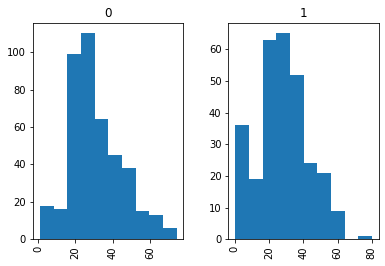

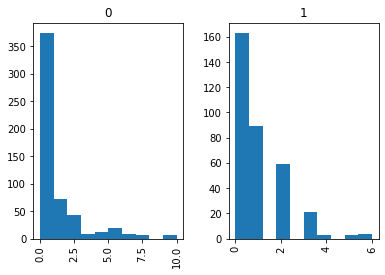

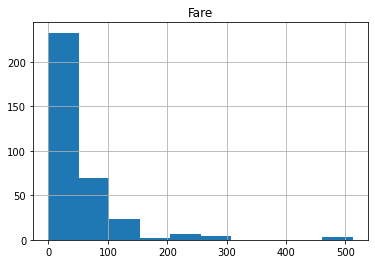

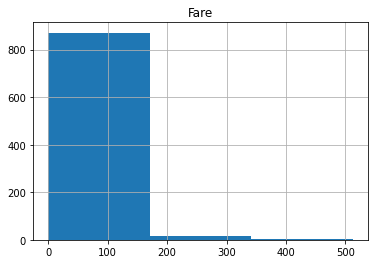

In [234]:
display(Markdown("### Distribution of fare and age"))
train_set.hist(column = 'Age', by = 'Survived')
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch']
train_set.hist(column = 'FamilySize', by = 'Survived')
train_set[train_set['Survived'] == 1].hist(column = 'Fare')
train_set.hist(column = 'Fare', bins=3)
plt.show()

### Survival rate by fare or age group

After analysing the distribution I concluded that 3 fare groups and 9 age groups are the best choice for a smooth distribution.

,AgeGroup,Survived,0
0,1,0,0.387097
1,4,0,0.562874
2,6,0,0.583333
3,2,0,0.598039
4,5,0,0.617978
5,3,0,0.650000
6,7,0,0.684211
7,8,0,0.711957
8,8,1,0.288043
9,7,1,0.315789


### Death rate by age group

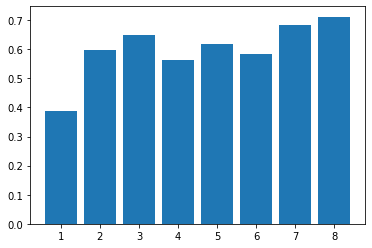

### Survival rate by age group

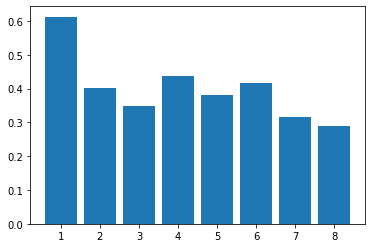

,FareGroup,Survived,0
0,1,0,0.346154
1,0,0,0.626450
2,0,1,0.373550
3,1,1,0.653846
4,2,1,1.000000


### Death rate by fare group

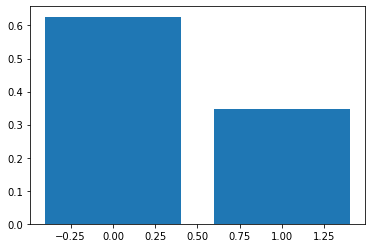

### Survival rate by fare group

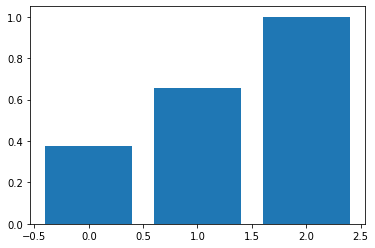

In [238]:
display(Markdown("### Survival rate by fare or age group"))
display(Markdown("""After analysing the distribution I concluded that 3 fare groups \
and 9 age groups are the best choice for a smooth distribution."""))

bins = np.linspace(start=0, stop=70, num=8)
train_set['AgeGroup'] = np.digitize(train_set['Age'], bins)

#bins = np.linspace(start=0, stop=600, num=7)
bins = [150, 350]
train_set['FareGroup'] = np.digitize(train_set['Fare'], bins)

age_cnt = relative_count(train_set, ['AgeGroup', 'Survived'], 1)
fare_cnt = relative_count(train_set, ['FareGroup', 'Survived'], 1)

display(age_cnt)
display(Markdown("### Death rate by age group"))
plt.bar(age_cnt[age_cnt["Survived"] == 0]["AgeGroup"], age_cnt[age_cnt["Survived"] == 0][0])
plt.show()
display(Markdown("### Survival rate by age group"))
plt.bar(age_cnt[age_cnt["Survived"] == 1]["AgeGroup"], age_cnt[age_cnt["Survived"] == 1][0])
plt.show()
display(fare_cnt)
display(Markdown("### Death rate by fare group"))
plt.bar(fare_cnt[fare_cnt["Survived"] == 0]["FareGroup"], fare_cnt[fare_cnt["Survived"] == 0][0])
plt.show()
display(Markdown("### Survival rate by fare group"))
plt.bar(fare_cnt[fare_cnt["Survived"] == 1]["FareGroup"], fare_cnt[fare_cnt["Survived"] == 1][0])
plt.show()

In [218]:
train_set.value_counts(["FareGroup"])

FareGroup
0            871
1             20
dtype: int64

In [220]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

